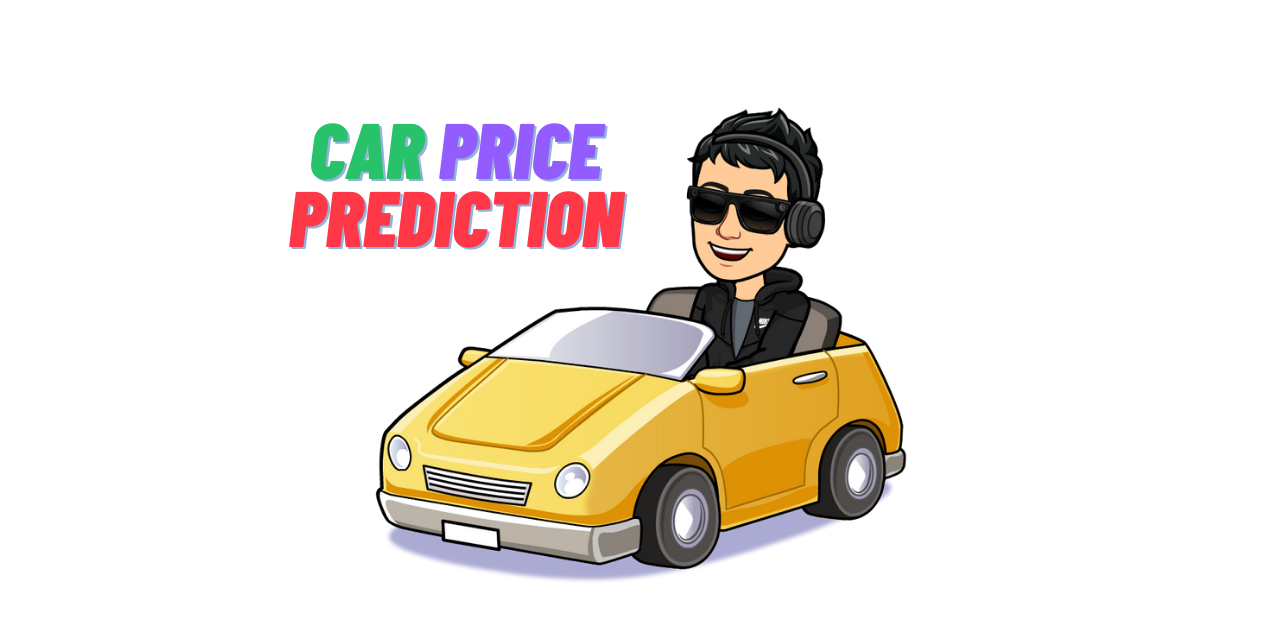

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df=pd.read_csv('processes2.csv',index_col=0)

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,Maruti,2017,425000,12000,Petrol,Individual,Manual,First Owner,5,67.04,kmpl,23.10,998
6246,Toyota,2014,425000,50000,Diesel,Individual,Manual,First Owner,5,67.06,kmpl,23.59,1364
6249,Maruti,2011,200000,73000,Petrol,Individual,Manual,First Owner,5,46.30,kmpl,19.70,796
6253,Maruti,2017,360000,80000,Petrol,Individual,Manual,First Owner,5,67.04,kmpl,20.51,998


<Axes: >

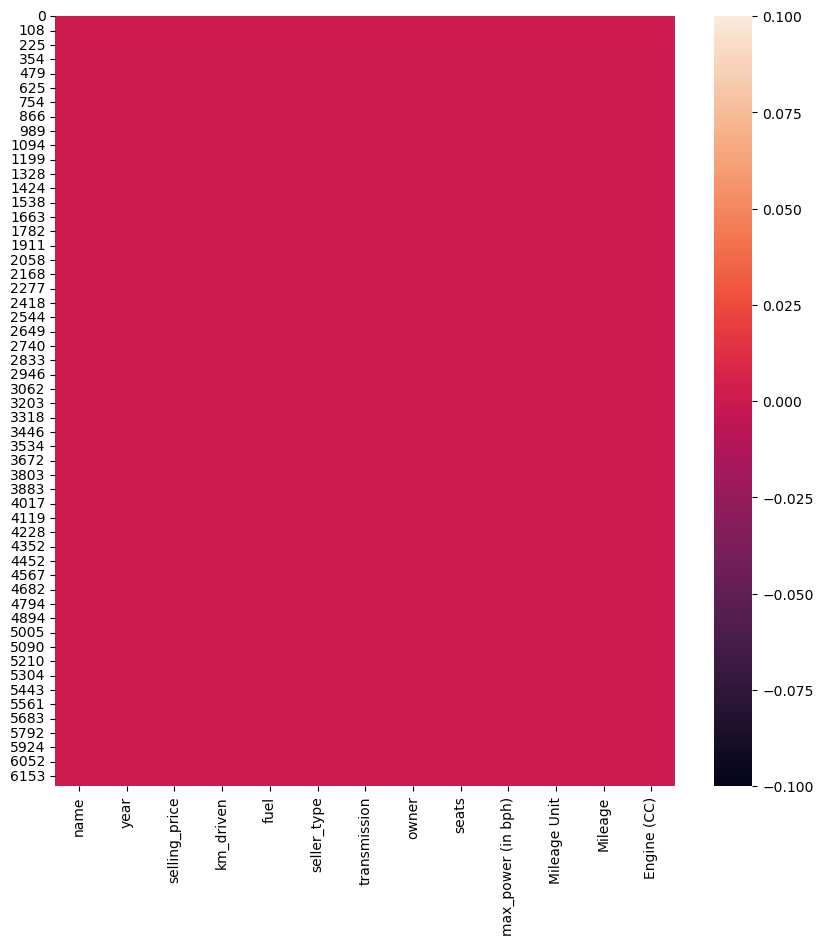

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

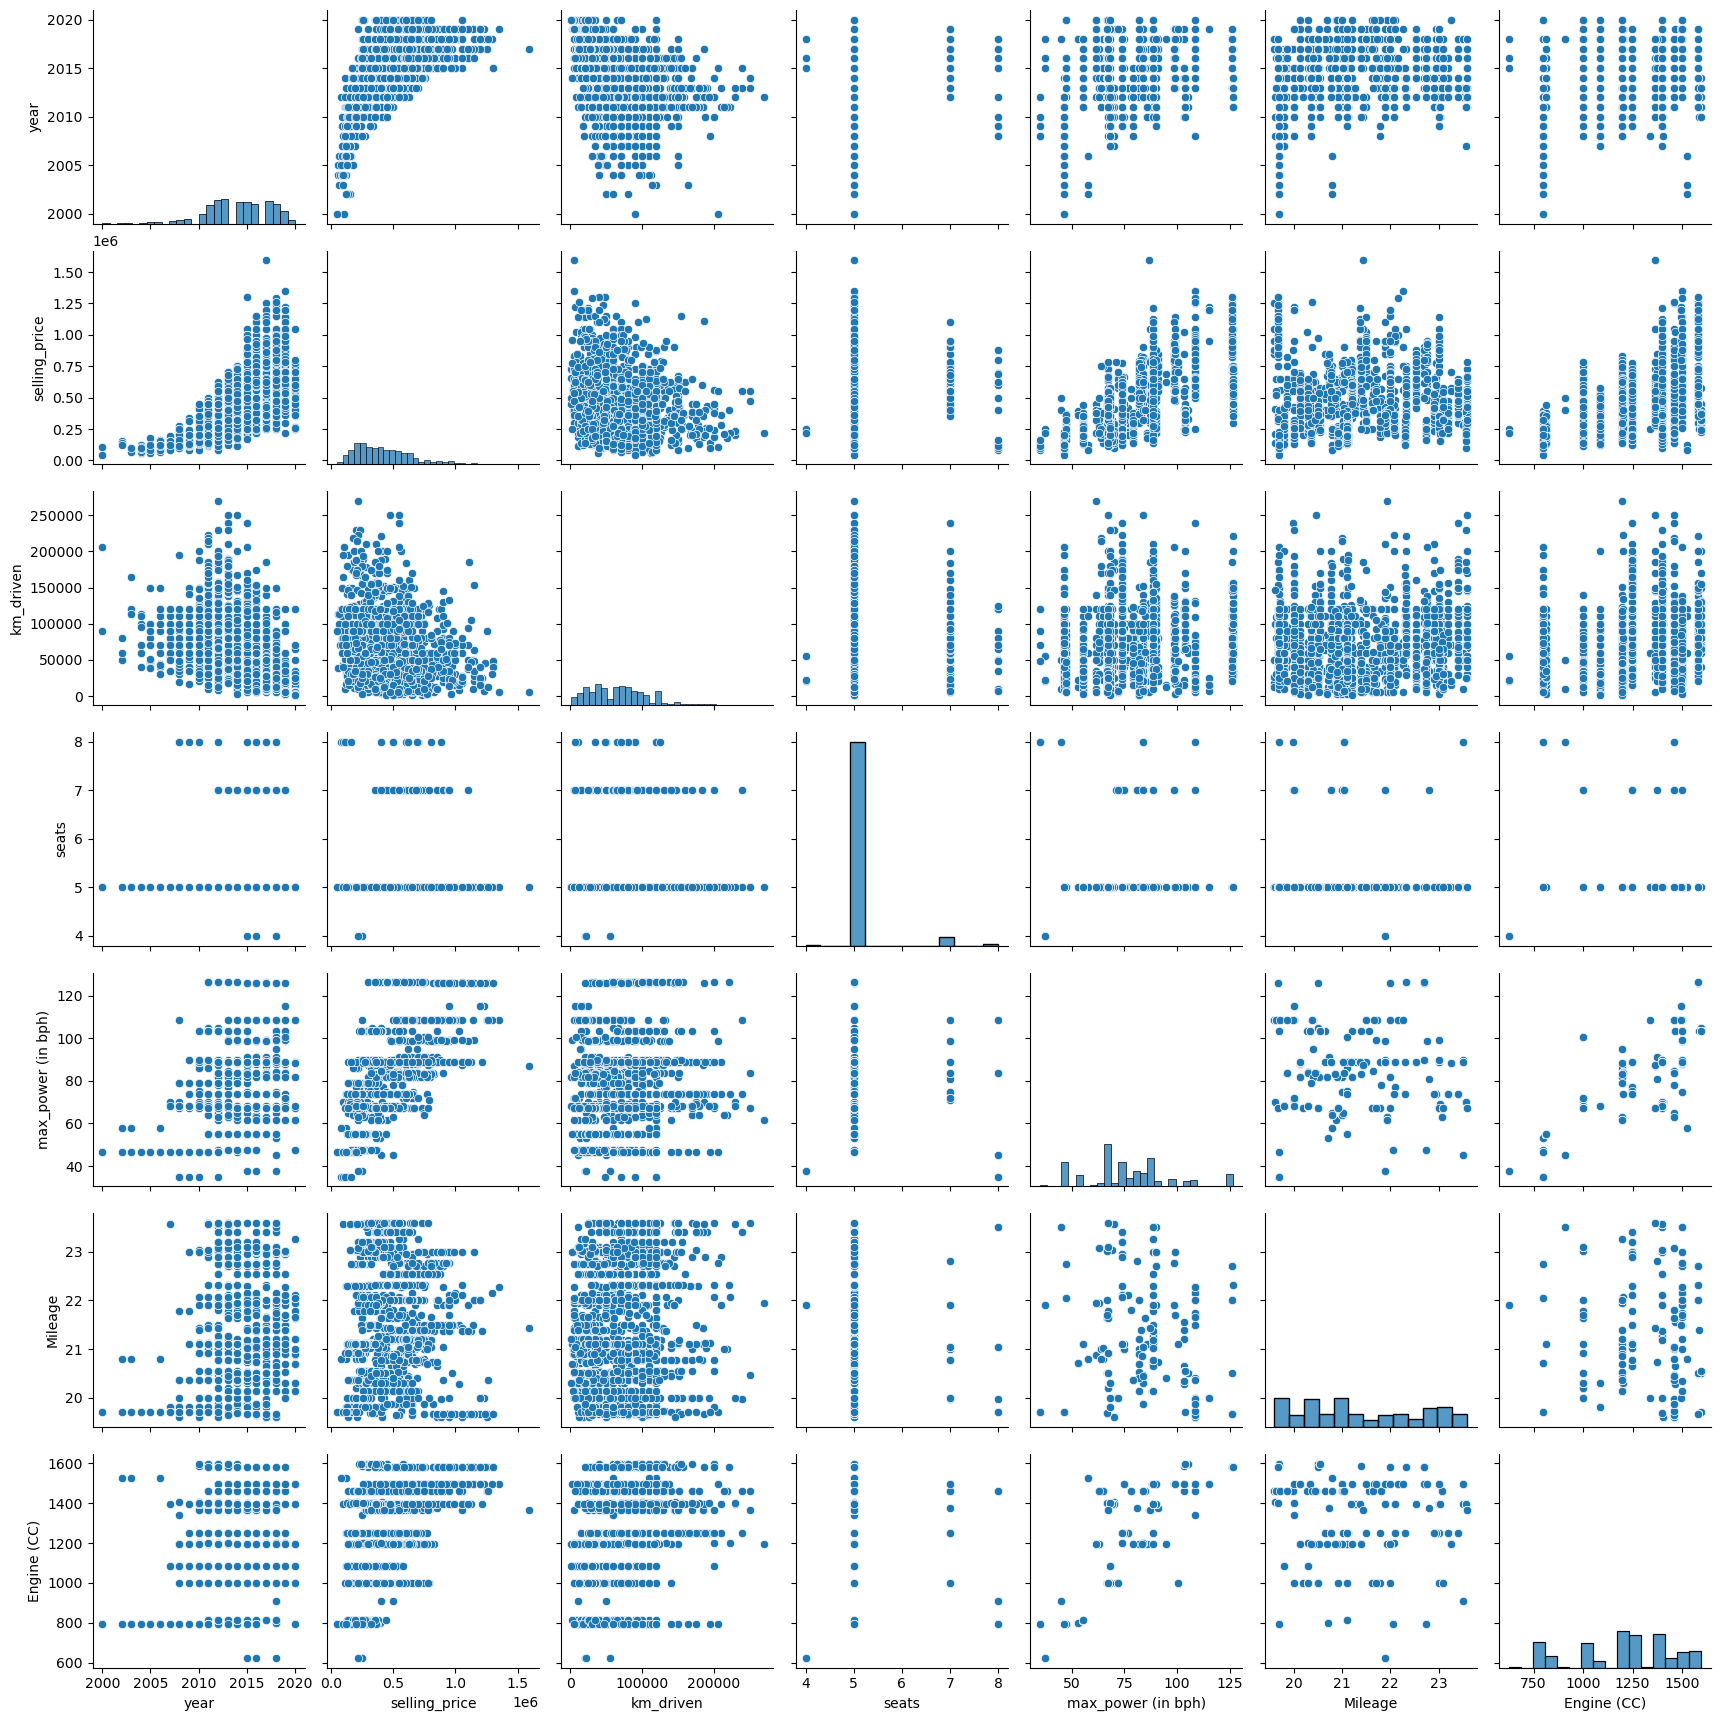

In [5]:
sns.pairplot(df)

In [6]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [7]:
df.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399
15,Hyundai,2012,500000,53000,Diesel,Individual,Manual,Second Owner,5,90.00,kmpl,23.00,1396
16,Maruti,2002,150000,80000,Petrol,Individual,Manual,Second Owner,5,46.30,kmpl,19.70,796
17,Hyundai,2016,680000,100000,Diesel,Individual,Manual,First Owner,5,88.73,kmpl,22.54,1396
18,Mahindra,2011,174000,100000,Diesel,Individual,Manual,Second Owner,5,64.10,kmpl,21.00,1461
21,Maruti,2012,600000,72000,Diesel,Individual,Manual,First Owner,5,88.80,kmpl,21.50,1248


In [8]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [9]:
X=df.drop(['selling_price'],axis=1)
X

,name,year,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,Maruti,2014,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
2,Hyundai,2010,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
4,Hyundai,2017,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
7,Toyota,2011,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
8,Ford,2013,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399
...,...,...,...,...,...,...,...,...,...,...,...,...
6245,Maruti,2017,12000,Petrol,Individual,Manual,First Owner,5,67.04,kmpl,23.10,998
6246,Toyota,2014,50000,Diesel,Individual,Manual,First Owner,5,67.06,kmpl,23.59,1364
6249,Maruti,2011,73000,Petrol,Individual,Manual,First Owner,5,46.30,kmpl,19.70,796
6253,Maruti,2017,80000,Petrol,Individual,Manual,First Owner,5,67.04,kmpl,20.51,998


In [10]:
y=df['selling_price']
y

0       450000
2       225000
4       440000
7       350000
8       200000
         ...  
6245    425000
6246    425000
6249    200000
6253    360000
6256    475000
Name: selling_price, Length: 2095, dtype: int64

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train.shape

(1676, 12)

In [13]:
X_test.shape

(419, 12)

In [14]:
le=LabelEncoder()

In [15]:
df['Mileage Unit'].unique()

array(['kmpl', 'km/kg'], dtype=object)

In [16]:
df['name']=le.fit_transform(df['name'])
df['owner']=le.fit_transform(df['owner'])

In [17]:
df['fuel']=df.fuel.map({'Diesel':1,'Petrol':2,'CNG':3,'LPG':4})
df['seller_type']=df.seller_type.map({'Individual':1,'Dealer':2,'Trustmark Dealer':3})
df['transmission']=df.transmission.map({'Automatic':1,'Manual':2})
df['Mileage Unit']=df['Mileage Unit'].map({'kmpl':1,'km/kg':2})

In [18]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,5,2014,450000,145500,1,1,2,0,5,74.00,1,23.40,1248
2,3,2010,225000,127000,1,1,2,0,5,90.00,1,23.00,1396
4,3,2017,440000,45000,2,1,2,0,5,81.86,1,20.14,1197
7,8,2011,350000,90000,1,1,2,0,5,67.10,1,23.59,1364
8,1,2013,200000,169000,1,1,2,0,5,68.10,1,20.00,1399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,5,2017,425000,12000,2,1,2,0,5,67.04,1,23.10,998
6246,8,2014,425000,50000,1,1,2,0,5,67.06,1,23.59,1364
6249,5,2011,200000,73000,2,1,2,0,5,46.30,1,19.70,796
6253,5,2017,360000,80000,2,1,2,0,5,67.04,1,20.51,998


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['name'] = le.fit_transform(X_train['name'])
X_train['fuel'] = le.fit_transform(X_train['fuel'])
X_train['seller_type'] = le.fit_transform(X_train['seller_type'])
X_train['transmission'] = le.fit_transform(X_train['transmission'])
X_train['owner'] = le.fit_transform(X_train['owner'])
X_train['Mileage Unit'] = le.fit_transform(X_train['Mileage Unit'])


X_test['name'] = le.fit_transform(X_test['name'])
X_test['fuel'] = le.fit_transform(X_test['fuel'])
X_test['seller_type'] = le.fit_transform(X_test['seller_type'])
X_test['transmission'] = le.fit_transform(X_test['transmission'])
X_test['owner'] = le.fit_transform(X_test['owner'])
X_test['Mileage Unit'] = le.fit_transform(X_test['Mileage Unit'])

In [20]:
print(X_train.dtypes)


name                    int32
year                    int64
km_driven               int64
fuel                    int32
seller_type             int32
transmission            int32
owner                   int32
seats                   int64
max_power (in bph)    float64
Mileage Unit            int32
Mileage               float64
Engine (CC)             int64
dtype: object


In [21]:
lr=LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred=lr.predict(X_test)
score1=r2_score(y_test,y_pred)
score1

0.7140074472504696

In [25]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [29]:
rfr=RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2,
                          min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                          max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0,
                          bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
                          verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
rfr.fit(X_train,y_train)
y_pred_rfr=rfr.predict(X_test)
score2=r2_score(y_test,y_pred_rfr)
score2

0.8972599111610359

In [31]:
model=GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred_model=model.predict(X_test)
score3=r2_score(y_test,y_pred_model)
score3

0.8870107642115281

In [32]:
sv=SVR()
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)
score4=r2_score(y_test,y_pred_sv)
score4

-0.00032269607872570383

In [33]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred_dtr=dtr.predict(X_test)
score5=r2_score(y_test,y_pred_dtr)
score5

0.8189609323224631

In [34]:
knr=KNeighborsRegressor()
knr.fit(X_train,y_train)
y_pred_knr=knr.predict(X_test)
score6=r2_score(y_test,y_pred_knr)
score6

0.4598094333678814

In [35]:
## Save Model

In [37]:
import joblib
joblib.dump(rfr,'Car_Random_Forest_regressor.pkl')

['Car_Random_Forest_regressor']

In [28]:
df.head(43)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,5,2014,450000,145500,1,1,2,0,5,74.000,1,23.40,1248
2,3,2010,225000,127000,1,1,2,0,5,90.000,1,23.00,1396
4,3,2017,440000,45000,2,1,2,0,5,81.860,1,20.14,1197
7,8,2011,350000,90000,1,1,2,0,5,67.100,1,23.59,1364
8,1,2013,200000,169000,1,1,2,0,5,68.100,1,20.00,1399
15,3,2012,500000,53000,1,1,2,2,5,90.000,1,23.00,1396
16,5,2002,150000,80000,2,1,2,2,5,46.300,1,19.70,796
17,3,2016,680000,100000,1,1,2,0,5,88.730,1,22.54,1396
18,4,2011,174000,100000,1,1,2,2,5,64.100,1,21.00,1461
21,5,2012,600000,72000,1,1,2,0,5,88.800,1,21.50,1248


In [62]:
df['owner'].unique()

array([0, 2, 4, 1, 3])

In [7]:
df.head(850)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,Hyundai,2016,825000,39000,Diesel,Dealer,Manual,First Owner,5,88.70,kmpl,21.38,1396
2608,Ford,2015,599000,92651,Diesel,Dealer,Manual,First Owner,5,98.96,kmpl,21.70,1498
2616,Hyundai,2013,165000,45000,Petrol,Individual,Manual,Second Owner,5,55.20,kmpl,21.10,814
2619,Maruti,2016,470000,23700,Petrol,Individual,Manual,First Owner,5,81.80,kmpl,20.40,1197


In [8]:
df['name'].unique()

array(['Maruti', 'Hyundai', 'Toyota', 'Ford', 'Mahindra', 'Tata',
       'Volkswagen', 'Renault', 'Chevrolet', 'Honda'], dtype=object)